In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving processed_casedetails.csv to processed_casedetails.csv


In [3]:
df = pd.read_csv('processed_casedetails.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5902 non-null   int64  
 1   age             5902 non-null   float64
 2   sex             5902 non-null   int64  
 3   nationality     5902 non-null   int64  
 4   current_status  5902 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 230.7 KB


In [5]:
X = df[['age', 'sex', 'nationality']]
y = df['current_status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = svm.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9796782387806944


In [10]:
precision = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: ", precision)

Precision:  0.9597694515404432


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)

Recall:  0.9796782387806944


In [12]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

F1 Score:  0.9696216614792671


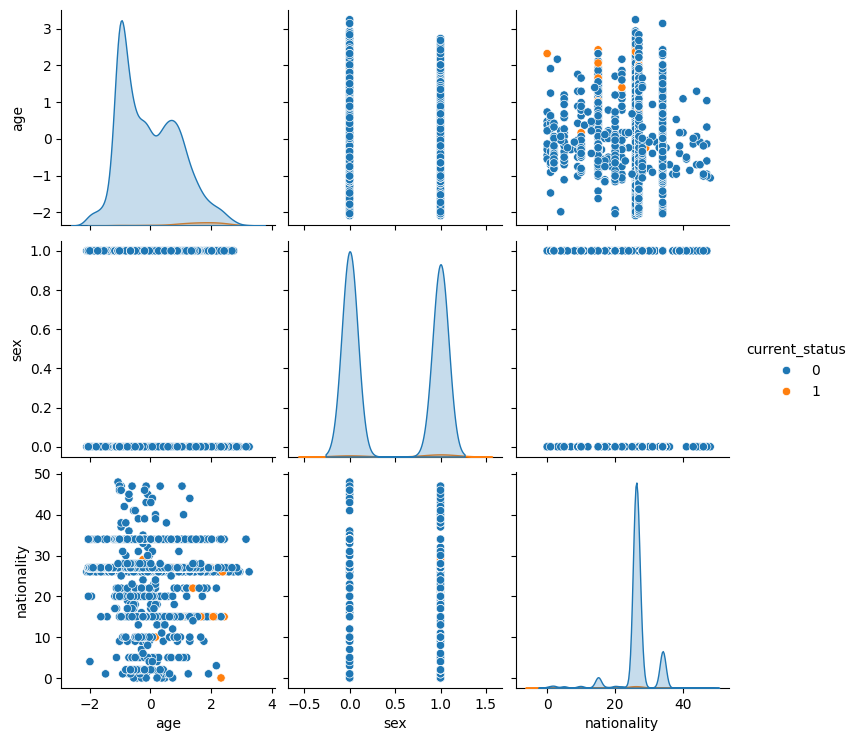

In [ ]:
sns.pairplot(df, hue = "current_status", vars=["age", "sex", "nationality"])
plt.show()

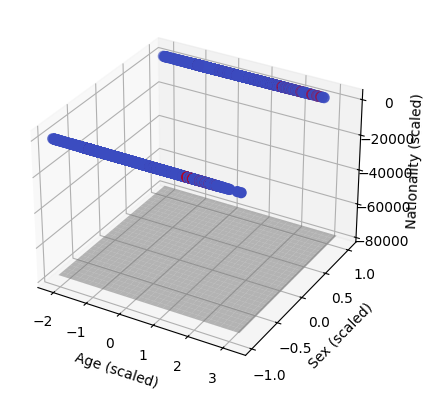

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w = svm.coef_[0]
b = svm.intercept_[0]

x_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 30)
y_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 30)
xx, yy = np.meshgrid(x_range, y_range)

zz = (-w[0] * xx - w[1] * yy - b) / w[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap=plt.cm.coolwarm, s=50)
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Sex (scaled)')
ax.set_zlabel('Nationality (scaled)')

plt.show()